## Telecom Customer Churn.ipynb
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

## Import Libraries and load dataset

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [52]:
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


We can see that there are 7043 rows and 21 columns in the dataset. Also, there are 19 object type, 1 int type and 1 float type columns in the dataset.
Total charges column is of object type, we need to convert it to float type.
We can see that there are 11 missing values in total charges column. We will drop these rows as it is a very small percentage of the total data.
We will also drop customer id column as it is of no use to us.

In [53]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

<Axes: xlabel='Churn', ylabel='count'>

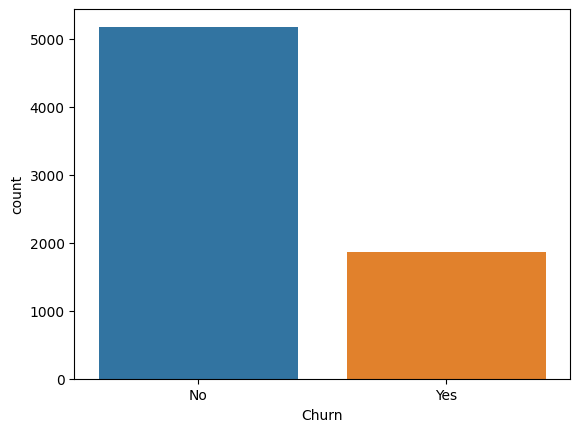

In [54]:
sns.countplot(x='Churn', data=df)

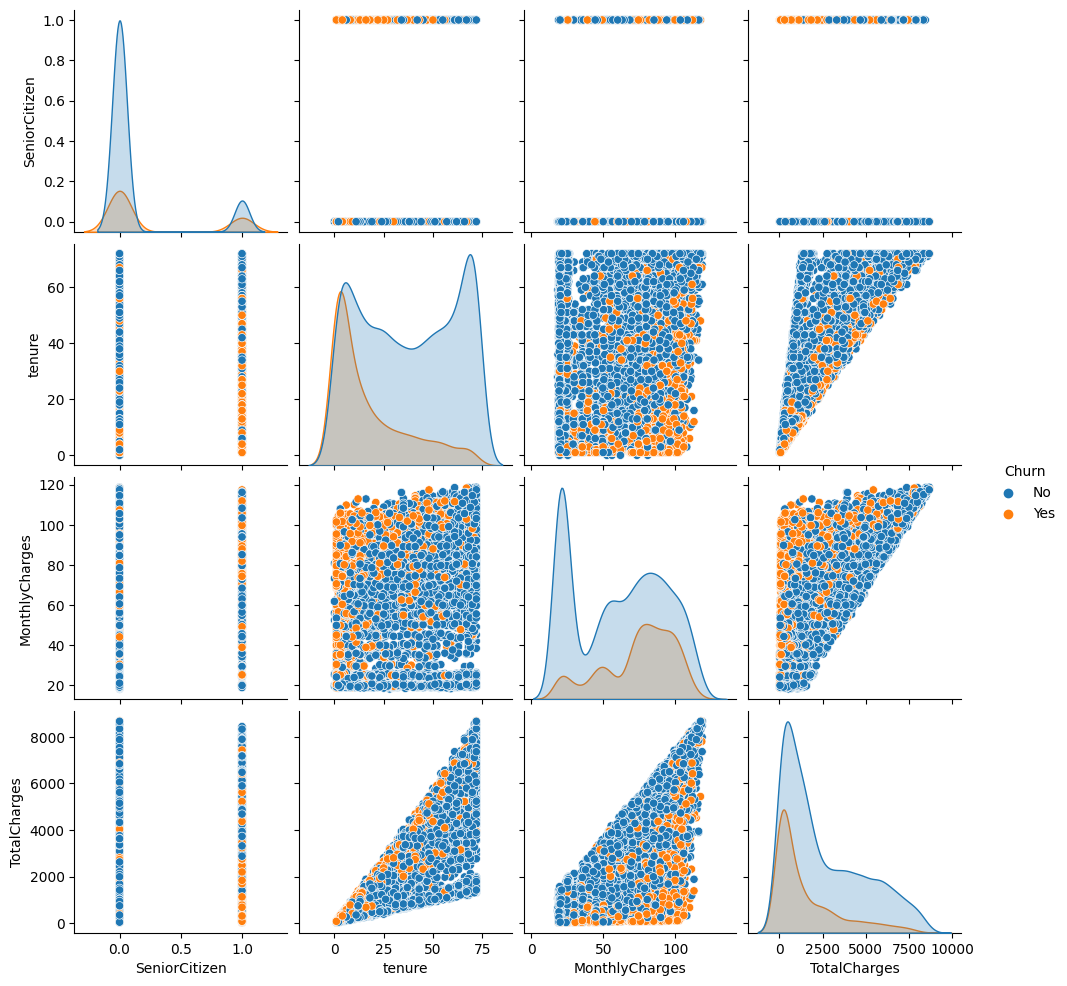

In [55]:
sns.pairplot(df, hue='Churn')

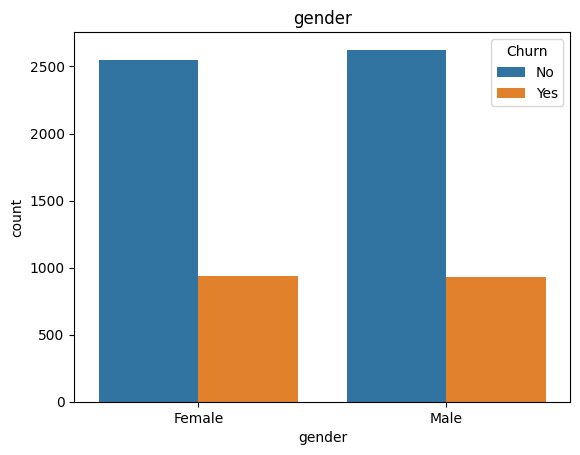

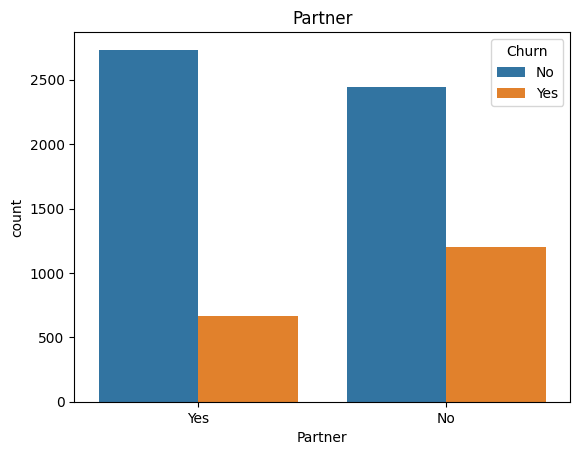

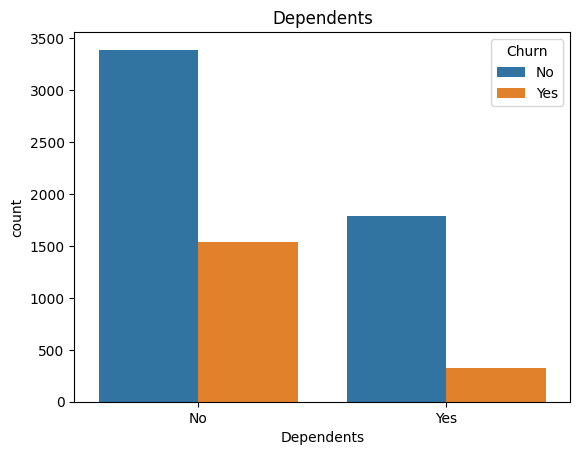

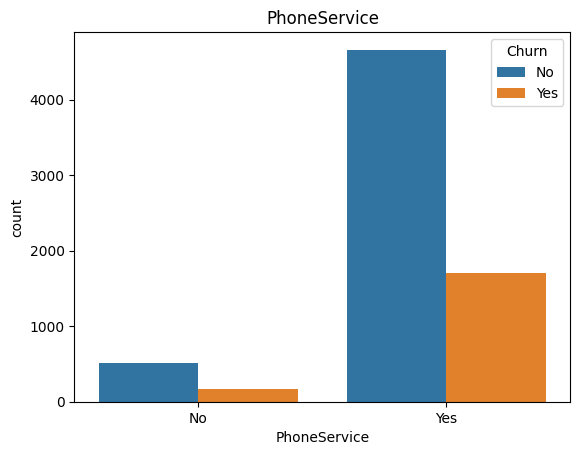

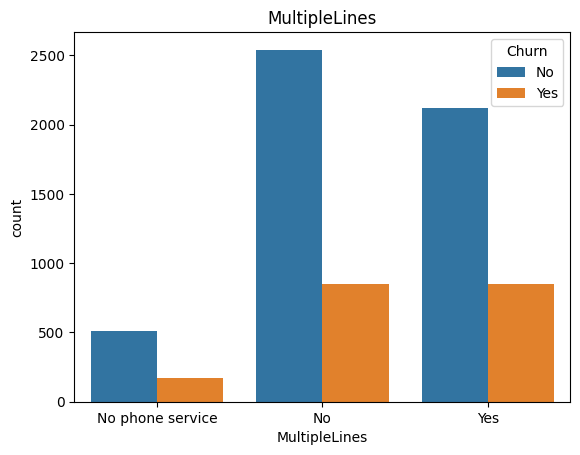

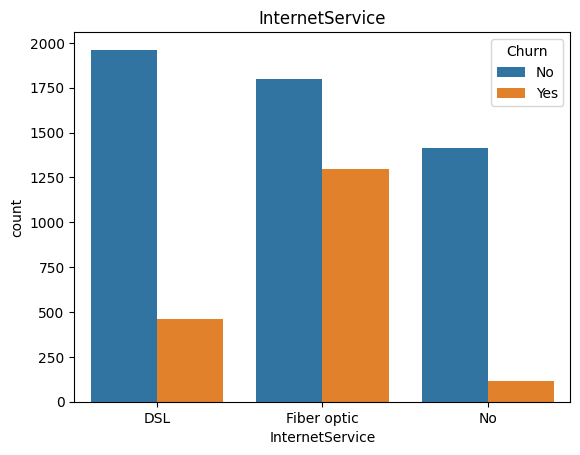

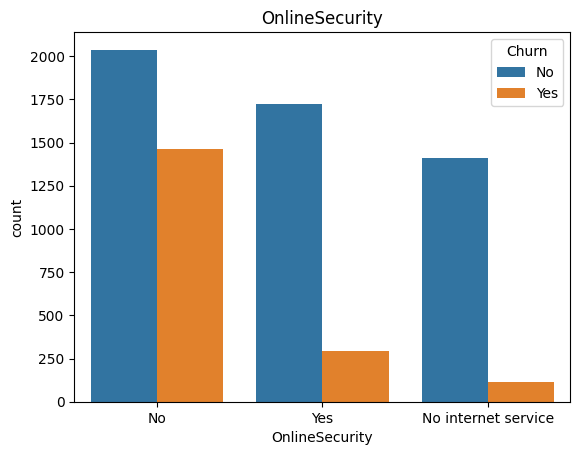

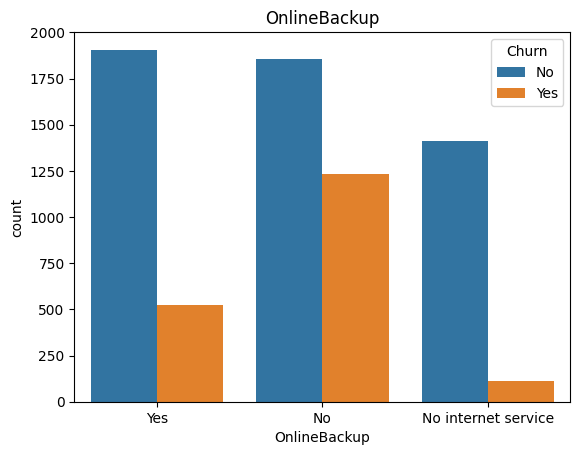

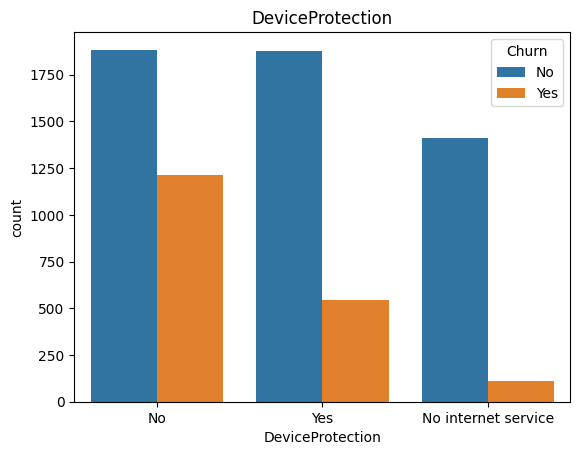

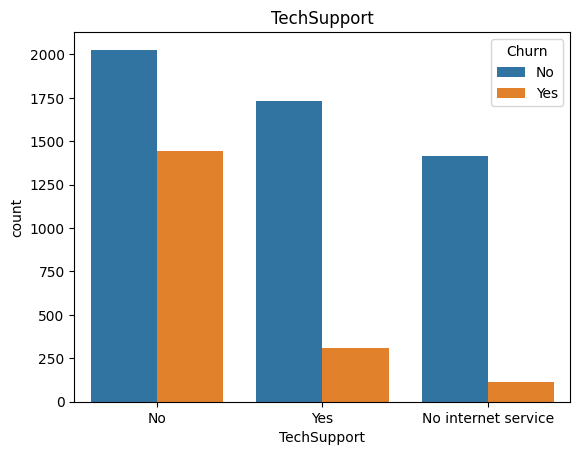

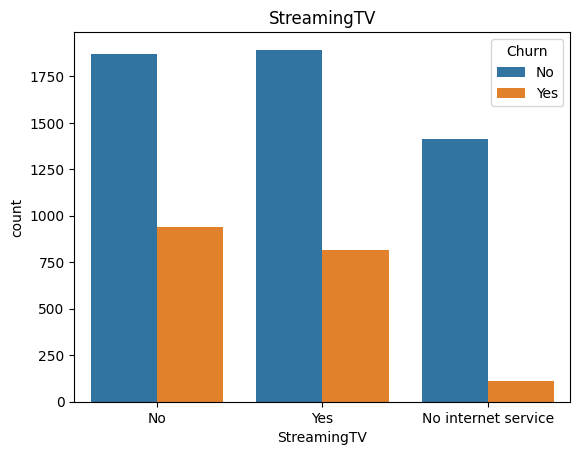

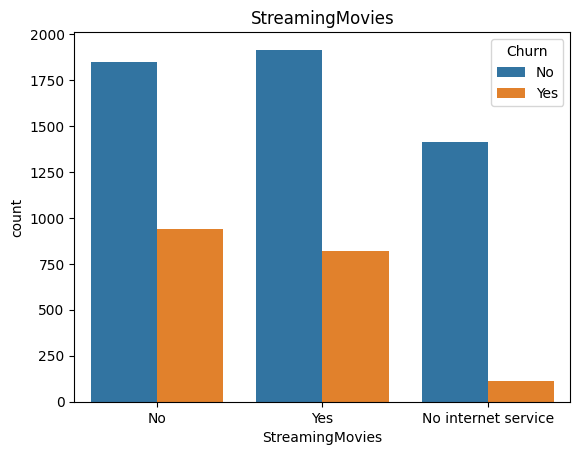

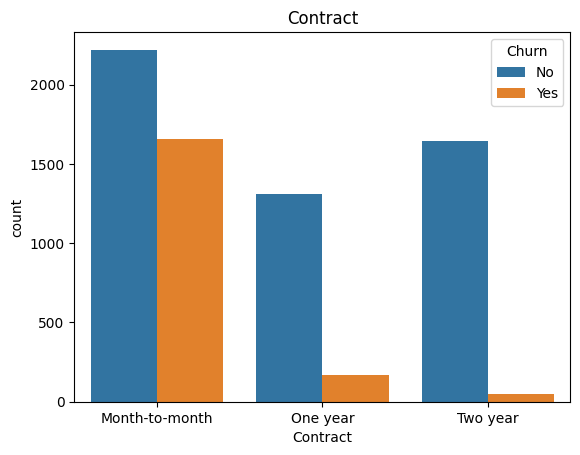

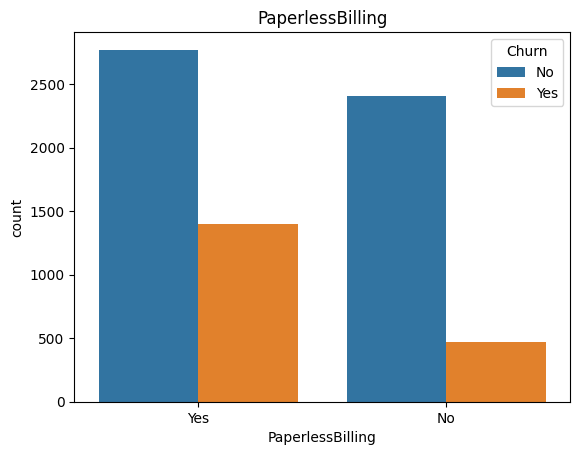

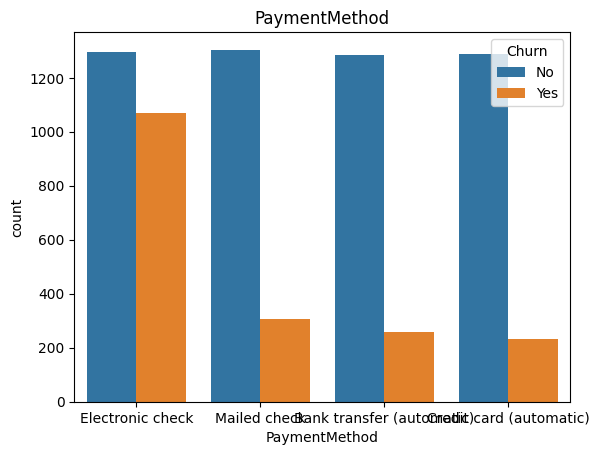

In [56]:
# for every feature plot the churn rate
for col in df.select_dtypes(include=['O']).columns:
    if col not in ['customerID', 'Churn']:
        sns.countplot(x=col, data=df,hue='Churn').set_title(col)
        plt.show()
        

We can see that there are 5174 customers who did not churn and 1869 customers who churned and left the company. So, we can say that the dataset is imbalanced.


### Data Preprocessing

In [57]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.drop('customerID', axis=1, inplace=True)

In [58]:
# Make dummy variables for all categorical variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

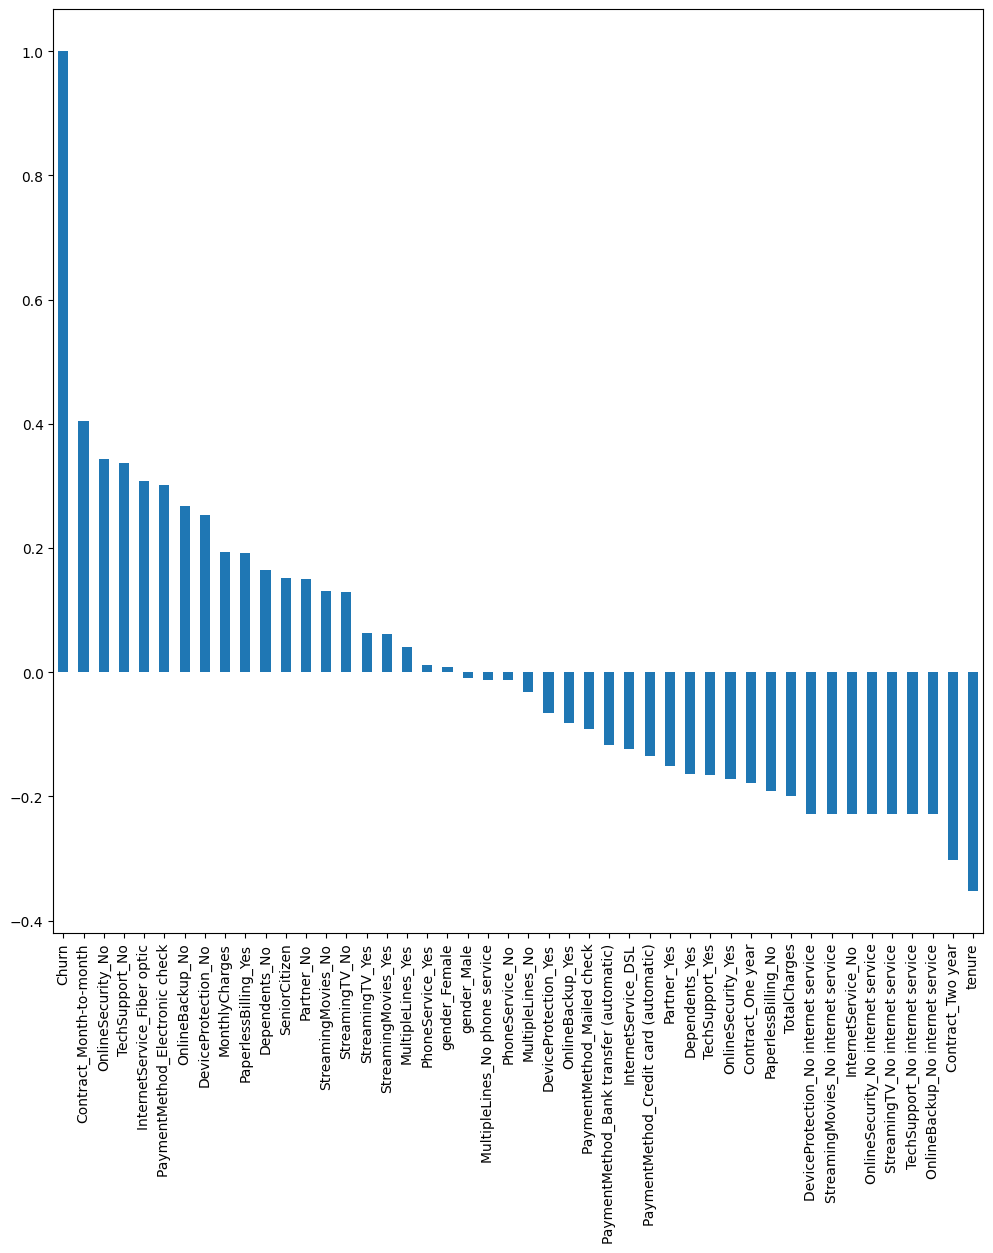

In [59]:
# Correlation plot
plt.figure(figsize=(12,12))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


In [60]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_dummies.astype(float)))
df_scaled.columns = df_dummies.columns
df_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables

### After going through the above EDA we will develop some predictive models and compare them.
We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost



In [68]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
df_scaled = df_scaled.dropna()
X = df_scaled.drop('Churn', axis=1)
y = df_scaled['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [72]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
        .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
        .format(logreg.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Accuracy of Logistic Regression classifier on training set: 0.80
Accuracy of Logistic Regression classifier on test set: 0.80
[[1381  168]
 [ 263  298]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [74]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
        .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
        .format(rf.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.78
[[1381  168]
 [ 292  269]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1549
         1.0       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [73]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('Accuracy of SVM classifier on training set: {:.2f}'
        .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
        .format(svm.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.79
[[1397  152]
 [ 292  269]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1549
         1.0       0.64      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [75]:
# AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print('Accuracy of AdaBoost classifier on training set: {:.2f}'
        .format(ada.score(X_train, y_train)))
print('Accuracy of AdaBoost classifier on test set: {:.2f}'
        .format(ada.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

Accuracy of AdaBoost classifier on training set: 0.81
Accuracy of AdaBoost classifier on test set: 0.79
[[1384  165]
 [ 276  285]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1549
         1.0       0.63      0.51      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [76]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('Accuracy of XGBoost classifier on training set: {:.2f}'
        .format(xgb.score(X_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
        .format(xgb.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Accuracy of XGBoost classifier on training set: 0.94
Accuracy of XGBoost classifier on test set: 0.78
[[1361  188]
 [ 277  284]]
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1549
         1.0       0.60      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



<Axes: >

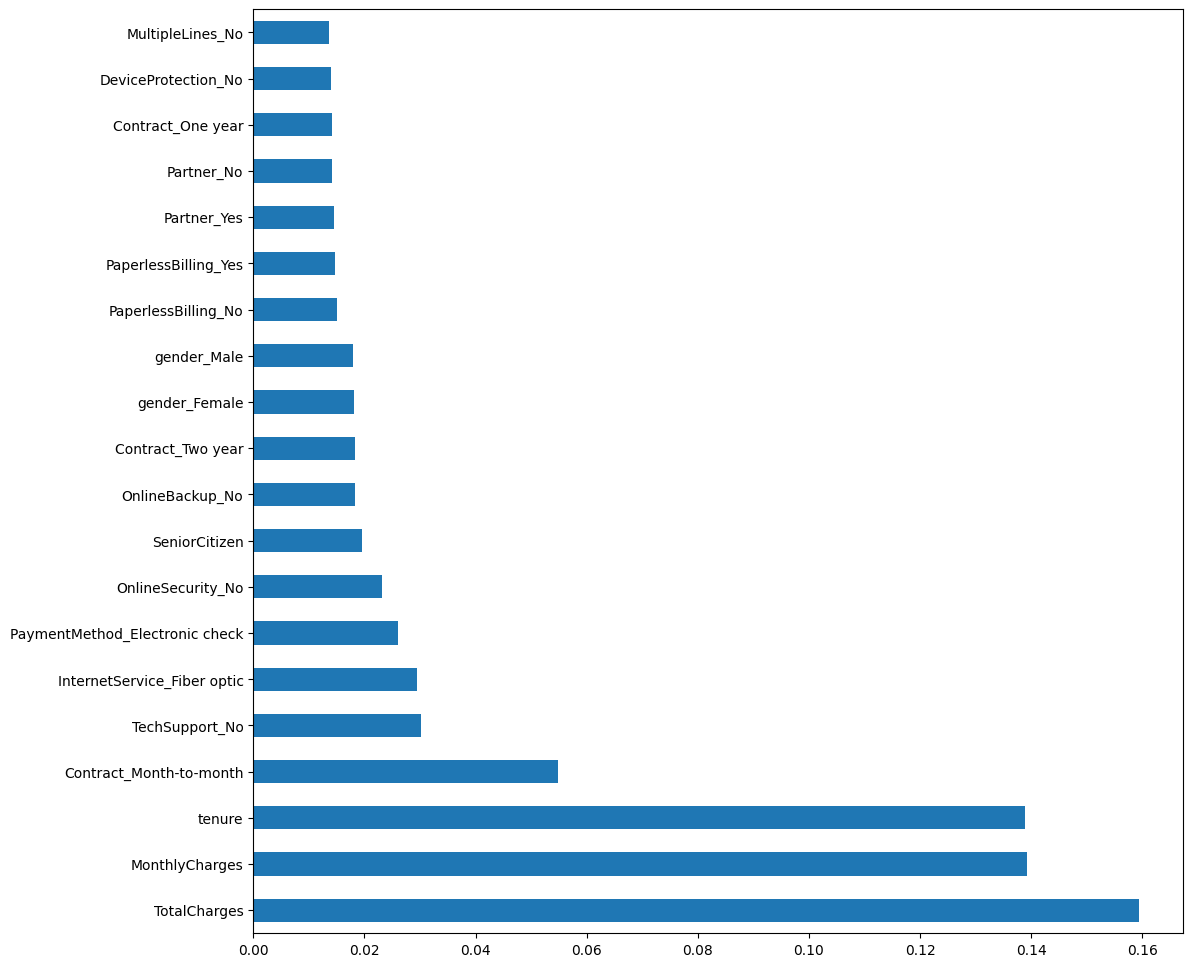

In [77]:
# Feature Importance
plt.figure(figsize=(12,12))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')


In [78]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Random Forest
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_params_)
print(CV_rf.best_score_)
y_pred_rf = CV_rf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
        .format(CV_rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
        .format(CV_rf.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
    

c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTre

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}
0.8063804630432092
Accuracy of Random Forest classifier on training set: 0.82
Accuracy of Random Forest classifier on test set: 0.79
[[1409  140]
 [ 297  264]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1549
         1.0       0.65      0.47      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [79]:
# XGBoost
xgb = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [4,5,6,7,8],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2]
}
CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 5)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_score_)
y_pred_xgb = CV_xgb.predict(X_test)
print('Accuracy of XGBoost classifier on training set: {:.2f}'
        .format(CV_xgb.score(X_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
        .format(CV_xgb.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
0.8017083488093764
Accuracy of XGBoost classifier on training set: 0.82
Accuracy of XGBoost classifier on test set: 0.80
[[1389  160]
 [ 267  294]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



<Axes: >

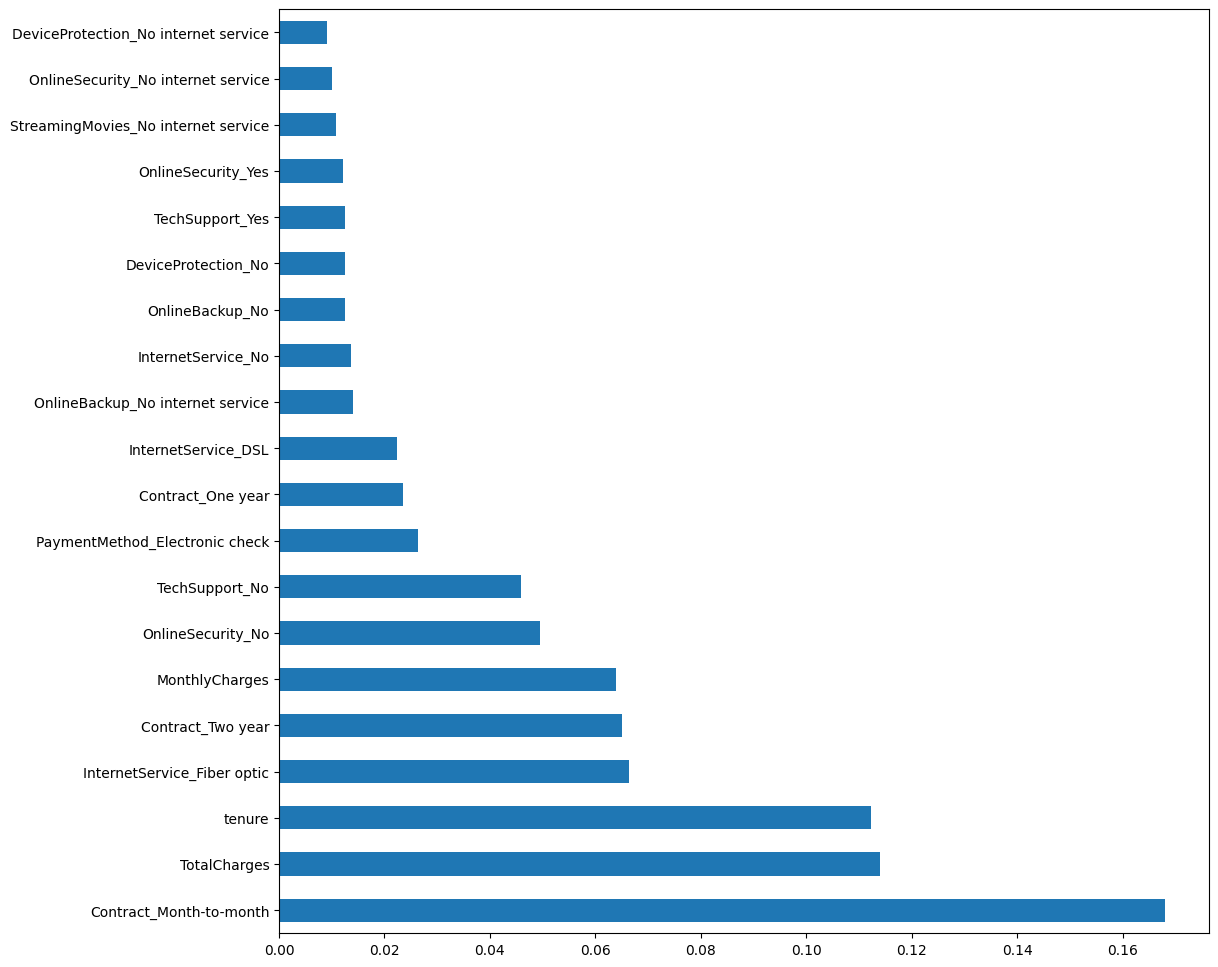

In [80]:
# Feature Importance
plt.figure(figsize=(12,12))
feat_importances = pd.Series(CV_rf.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [84]:
# compare the models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'AdaBoost', 'XGBoost'],
    'Score': [logreg.score(X_test, y_test), CV_rf.score(X_test, y_test), svm.score(X_test, y_test), ada.score(X_test, y_test), CV_xgb.score(X_test, y_test)],
    'Train Score': [logreg.score(X_train, y_train), CV_rf.score(X_train, y_train), svm.score(X_train, y_train), ada.score(X_train, y_train), CV_xgb.score(X_train, y_train)]
    , 'Best Params': ['-', CV_rf.best_params_, '-', '-', CV_xgb.best_params_]
    , 'Best Score': ['-', CV_rf.best_score_, '-', '-', CV_xgb.best_score_]
    , 'Confusion Matrix': [confusion_matrix(y_test, y_pred_log), confusion_matrix(y_test, y_pred_rf), confusion_matrix(y_test, y_pred_svm), confusion_matrix(y_test, y_pred_ada), confusion_matrix(y_test, y_pred_xgb)]})
models.sort_values(by='Score', ascending=False)


,Model,Score,Train Score,Best Params,Best Score,Confusion Matrix
4,XGBoost,0.797630,0.818163,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.801708,"[[1389, 160], [267, 294]]"
0,Logistic Regression,0.795735,0.803332,-,-,"[[1381, 168], [263, 298]]"
1,Random Forest,0.792891,0.822633,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.80638,"[[1409, 140], [297, 264]]"
3,AdaBoost,0.790995,0.809224,-,-,"[[1384, 165], [276, 285]]"
2,SVM,0.789573,0.819992,-,-,"[[1397, 152], [292, 269]]"
